# Assignment-11-Text Mining-02-Amazon Product Reviews

1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('extract_reviews_test2.csv')
reviews

,stars,comment
0,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I am total...
1,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Worst serv...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I am writi...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good one. ...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The best w...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice to re...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very good ...
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome..\...
1198,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n excellent\...


## Text Preprocessing

In [3]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I am totally disappointed with the product.There was no call from the bosch for installation & Demo and parts were broken while transit & bosch technician claim for replacement of parts but there was no call from bosch regarding replacement.',
 "Worst service ever I came across in the entire purchase history of Amazon.Bosch Hyd service center as well as technicians lie about dead lines multiple times. You wait for them wasting your time and the technicians don't pick up your phone for days.Product may be good but it's incomplete without service and support. That's why people prefer Samsung for everything for their swift and sophisticated service network.",
 "I am writing this review after nearly an year of use and I do have experience of using a Samsung FL which my parents have. After discount, I paid, 26,990 which I think was quite a bargain and also I got around 2.5k for my old machine.Delivery was as expected from Amazon, hassle free and on time. The installation happened the next

In [4]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'I am totally disappointed with the product.There was no call from the bosch for installation & Demo and parts were broken while transit & bosch technician claim for replacement of parts but there was no call from bosch regarding replacement. Worst service ever I came across in the entire purchase history of Amazon.Bosch Hyd service center as well as technicians lie about dead lines multiple times. You wait for them wasting your time and the technicians don\'t pick up your phone for days.Product may be good but it\'s incomplete without service and support. That\'s why people prefer Samsung for everything for their swift and sophisticated service network. I am writing this review after nearly an year of use and I do have experience of using a Samsung FL which my parents have. After discount, I paid, 26,990 which I think was quite a bargain and also I got around 2.5k for my old machine.Delivery was as expected from Amazon, hassle free and on time. The installation happened the next day. 

In [5]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I am totally disappointed with the productThere was no call from the bosch for installation  Demo and parts were broken while transit  bosch technician claim for replacement of parts but there was no call from bosch regarding replacement Worst service ever I came across in the entire purchase history of AmazonBosch Hyd service center as well as technicians lie about dead lines multiple times You wait for them wasting your time and the technicians dont pick up your phone for daysProduct may be good but its incomplete without service and support Thats why people prefer Samsung for everything for their swift and sophisticated service network I am writing this review after nearly an year of use and I do have experience of using a Samsung FL which my parents have After discount I paid 26990 which I think was quite a bargain and also I got around 25k for my old machineDelivery was as expected from Amazon hassle free and on time The installation happened the next day Person from Bosch was qu

In [6]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Hitesh
[nltk_data]     Koli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hitesh
[nltk_data]     Koli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'am', 'totally', 'disappointed', 'with', 'the', 'productThere', 'was', 'no', 'call', 'from', 'the', 'bosch', 'for', 'installation', 'Demo', 'and', 'parts', 'were', 'broken', 'while', 'transit', 'bosch', 'technician', 'claim', 'for', 'replacement', 'of', 'parts', 'but', 'there', 'was', 'no', 'call', 'from', 'bosch', 'regarding', 'replacement', 'Worst', 'service', 'ever', 'I', 'came', 'across', 'in', 'the', 'entire', 'purchase', 'history', 'of']


In [8]:
len(text_tokens)

27709

In [9]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['totally', 'disappointed', 'productThere', 'call', 'bosch', 'installation', 'Demo', 'parts', 'broken', 'transit', 'bosch', 'technician', 'claim', 'replacement', 'parts', 'call', 'bosch', 'regarding', 'replacement', 'Worst', 'service', 'ever', 'came', 'across', 'entire', 'purchase', 'history', 'AmazonBosch', 'Hyd', 'service', 'center', 'well', 'technicians', 'lie', 'dead', 'lines', 'multiple', 'times', 'You', 'wait', 'wasting', 'time', 'technicians', 'dont', 'pick', 'phone', 'daysProduct', 'may', 'good', 'incomplete', 'without', 'service', 'support', 'Thats', 'people', 'prefer', 'Samsung', 'everything', 'swift', 'sophisticated', 'service', 'network', 'writing', 'review', 'nearly', 'year', 'use', 'experience', 'using', 'Samsung', 'FL', 'parents', 'After', 'discount', 'paid', '26990', 'think', 'quite', 'bargain', 'also', 'got', 'around', '25k', 'old', 'machineDelivery', 'expected', 'Amazon', 'hassle', 'free', 'time', 'installation', 'happened', 'next', 'day', 'Person', 'Bosch', 'quite', 

In [10]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['totally', 'disappointed', 'productthere', 'call', 'bosch', 'installation', 'demo', 'parts', 'broken', 'transit', 'bosch', 'technician', 'claim', 'replacement', 'parts', 'call', 'bosch', 'regarding', 'replacement', 'worst', 'service', 'ever', 'came', 'across', 'entire', 'purchase', 'history', 'amazonbosch', 'hyd', 'service', 'center', 'well', 'technicians', 'lie', 'dead', 'lines', 'multiple', 'times', 'you', 'wait', 'wasting', 'time', 'technicians', 'dont', 'pick', 'phone', 'daysproduct', 'may', 'good', 'incomplete', 'without', 'service', 'support', 'thats', 'people', 'prefer', 'samsung', 'everything', 'swift', 'sophisticated', 'service', 'network', 'writing', 'review', 'nearly', 'year', 'use', 'experience', 'using', 'samsung', 'fl', 'parents', 'after', 'discount', 'paid', '26990', 'think', 'quite', 'bargain', 'also', 'got', 'around', '25k', 'old', 'machinedelivery', 'expected', 'amazon', 'hassle', 'free', 'time', 'installation', 'happened', 'next', 'day', 'person', 'bosch', 'quite', 

In [11]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['total', 'disappoint', 'productther', 'call', 'bosch', 'instal', 'demo', 'part', 'broken', 'transit', 'bosch', 'technician', 'claim', 'replac', 'part', 'call', 'bosch', 'regard', 'replac', 'worst', 'servic', 'ever', 'came', 'across', 'entir', 'purchas', 'histori', 'amazonbosch', 'hyd', 'servic', 'center', 'well', 'technician', 'lie', 'dead', 'line', 'multipl', 'time', 'you', 'wait', 'wast', 'time', 'technician', 'dont', 'pick', 'phone', 'daysproduct', 'may', 'good', 'incomplet', 'without', 'servic', 'support', 'that', 'peopl', 'prefer', 'samsung', 'everyth', 'swift', 'sophist', 'servic', 'network', 'write', 'review', 'nearli', 'year', 'use', 'experi', 'use', 'samsung', 'fl', 'parent', 'after', 'discount', 'paid', '26990', 'think', 'quit', 'bargain', 'also', 'got', 'around', '25k', 'old', 'machinedeliveri', 'expect', 'amazon', 'hassl', 'free', 'time', 'instal', 'happen', 'next', 'day', 'person', 'bosch', 'quit', 'courteou', 'help', 'though', 'tri', 'sell', 'stand', 'machin', 'cover', '

In [12]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

totally disappointed productthere call bosch installation demo parts broken transit bosch technician claim replacement parts call bosch regarding replacement worst service ever came across entire purchase history amazonbosch hyd service center well technicians lie dead lines multiple times you wait wasting time technicians dont pick phone daysproduct may good incomplete without service support thats people prefer samsung everything swift sophisticated service network writing review nearly year use experience using samsung fl parents after discount paid 26990 think quite bargain also got around 25k old machinedelivery expected amazon hassle free time installation happened next day person bosch quite courteous helpful though try sell stand machine cover etc etcnow machine quite looker nice design brushed chrome go stand keeping level surface dont need move around washes expected major pros you set temperature wash mode upto 90 degrees celsius its boon wife dust allergies my water consump

In [13]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['totally', 'disappointed', 'productthere', 'call', 'bosch', 'installation', 'demo', 'part', 'break', 'transit', 'bosch', 'technician', 'claim', 'replacement', 'part', 'call', 'bosch', 'regard', 'replacement', 'bad', 'service', 'ever', 'come', 'across', 'entire', 'purchase', 'history', 'amazonbosch', 'hyd', 'service', 'center', 'well', 'technician', 'lie', 'dead', 'line', 'multiple', 'time', '-PRON-', 'wait', 'waste', 'time', 'technician', 'do', 'not', 'pick', 'phone', 'daysproduct', 'may', 'good', 'incomplete', 'without', 'service', 'support', 'that', 's', 'people', 'prefer', 'samsung', 'everything', 'swift', 'sophisticated', 'service', 'network', 'writing', 'review', 'nearly', 'year', 'use', 'experience', 'use', 'samsung', 'fl', 'parent', 'after', 'discount', 'pay', '26990', 'think', 'quite', 'bargain', 'also', 'get', 'around', '25k', 'old', 'machinedelivery', 'expect', 'amazon', 'hassle', 'free', 'time', 'installation', 'happen', 'next', 'day', 'person', 'bosch', 'quite', 'courteous

In [14]:
clean_reviews=' '.join(lemmas)
clean_reviews

"totally disappointed productthere call bosch installation demo part break transit bosch technician claim replacement part call bosch regard replacement bad service ever come across entire purchase history amazonbosch hyd service center well technician lie dead line multiple time -PRON- wait waste time technician do not pick phone daysproduct may good incomplete without service support that s people prefer samsung everything swift sophisticated service network writing review nearly year use experience use samsung fl parent after discount pay 26990 think quite bargain also get around 25k old machinedelivery expect amazon hassle free time installation happen next day person bosch quite courteous helpful though try sell stand machine cover etc etcnow machine quite looker nice design brush chrome go stand keep level surface do not need move around wash expect major pro -PRON- set temperature wash mode upto 90 degree celsius -PRON- boon wife dust allergy -PRON- water consumption reduce leas

## Feature Extaction

### 1. Using CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [16]:
print(cv.vocabulary_)

{'totally': 2580, 'disappointed': 800, 'productthere': 1972, 'call': 471, 'bosch': 404, 'installation': 1320, 'demo': 755, 'part': 1807, 'break': 432, 'transit': 2588, 'technician': 2496, 'claim': 524, 'replacement': 2105, 'regard': 2077, 'bad': 334, 'service': 2259, 'ever': 939, 'come': 567, 'across': 172, 'entire': 920, 'purchase': 2012, 'history': 1227, 'amazonbosch': 238, 'hyd': 1253, 'center': 495, 'well': 2759, 'lie': 1435, 'dead': 718, 'line': 1445, 'multiple': 1639, 'time': 2546, 'pron': 1991, 'wait': 2716, 'waste': 2741, 'do': 818, 'not': 1701, 'pick': 1856, 'phone': 1851, 'daysproduct': 715, 'may': 1561, 'good': 1131, 'incomplete': 1289, 'without': 2796, 'support': 2462, 'that': 2517, 'people': 1825, 'prefer': 1911, 'samsung': 2201, 'everything': 943, 'swift': 2474, 'sophisticated': 2356, 'network': 1660, 'writing': 2821, 'review': 2143, 'nearly': 1647, 'year': 2827, 'use': 2665, 'experience': 970, 'fl': 1041, 'parent': 1806, 'after': 203, 'discount': 803, 'pay': 1816, '26990

In [17]:
print(cv.get_feature_names()[150:300])

['90', '96', 'aankh', 'ability', 'able', 'about', 'absolute', 'absolutely', 'absolve', 'abt', 'abutton', 'acceptable', 'accessoriesamazon', 'accessory', 'accidentally', 'accommodate', 'accord', 'accurate', 'accuratewith', 'acid', 'ack', 'acknowledge', 'across', 'act', 'acting', 'action', 'actually', 'ad', 'adamant', 'adapter', 'adaptor', 'add', 'addition', 'additional', 'address', 'adequate2', 'adjust', 'adjustable', 'adjustment', 'admire', 'adopter', 'adult', 'advanced', 'advancement', 'advantage', 'advertise', 'advertisedinstallation', 'advertisedthe', 'advice', 'advise', 'affect', 'affected', 'affordable', 'after', 'afyer', 'again', 'agency', 'agent', 'ago', 'agra', 'agree', 'agreement', 'ahead', 'aince', 'air', 'aise', 'all', 'allergy', 'allocate', 'allow', 'almost', 'alone', 'along', 'alot', 'already', 'alright', 'also', 'although', 'always', 'amaze', 'amazen', 'amazing', 'amazingcompare', 'amazingthe', 'amazingtoooooo', 'amazon', 'amazon1', 'amazon5wash', 'amazonbosch', 'amazonin

In [18]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(reviewscv.toarray().shape)

(17436, 2843)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [20]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [21]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazon', 'awesome', 'bad', 'be', 'bosch', 'but', 'buy', 'call', 'clean', 'clothe', 'come', 'cost', 'customer', 'damage', 'day', 'deliver', 'delivery', 'demo', 'do', 'drum', 'easy', 'engineer', 'even', 'excellent', 'experience', 'far', 'fine', 'first', 'front', 'get', 'give', 'go', 'good', 'great', 'happy', 'have', 'high', 'installation', 'issue', 'less', 'level', 'like', 'load', 'look', 'lot', 'low', 'machine', 'make', 'mode', 'money', 'month', 'much', 'need', 'nice', 'no', 'noise', 'not', 'one', 'option', 'part', 'perfect', 'performance', 'person', 'price', 'problem', 'product', 'pron', 'purchase', 'quality', 'really', 'receive', 'recommend', 'review', 'satisfied', 'say', 'service', 'silent', 'since', 'so', 'still', 'take', 'technician', 'this', 'till', 'time', 'top', 'use', 'value', 'very', 'vibration', 'wash', 'washing', 'water', 'week', 'well', 'work', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 

### 3. TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [23]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '1200', '15', '18', '2018', '23', '24', '2nd', '30', '40', '45', '48', 'able', 'absolutely', 'accessory', 'after', 'ago', 'all', 'allow', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'amc', 'and', 'another', 'anyone', 'appliance', 'area', 'around', 'arrive', 'as', 'ask', 'aug', 'automatic', 'available', 'awesome', 'back', 'bad', 'base', 'be', 'because', 'believe', 'besides', 'big', 'bit', 'body', 'book', 'bosch', 'bosh', 'bottom', 'box', 'brand', 'break', 'bring', 'browser', 'build', 'but', 'button', 'buy', 'buying', 'call', 'can', 'care', 'case', 'center', 'change', 'charge', 'charm', 'check', 'choice', 'choose', 'class', 'clean', 'cleaning', 'close', 'cloth', 'clothe', 'colour', 'come', 'comment', 'company', 'compare', 'complain', 'complaint', 'complete', 'completely', 'connection', 'consumption', 'contact', 'control', 'cost', 'costly', 'could', 'couple', 'cover', 'customer', 'customize', 'cycle', 'daily', 'damage', 'damaged', 'date', 'day', 'deal', 

### Generate Word Cloud

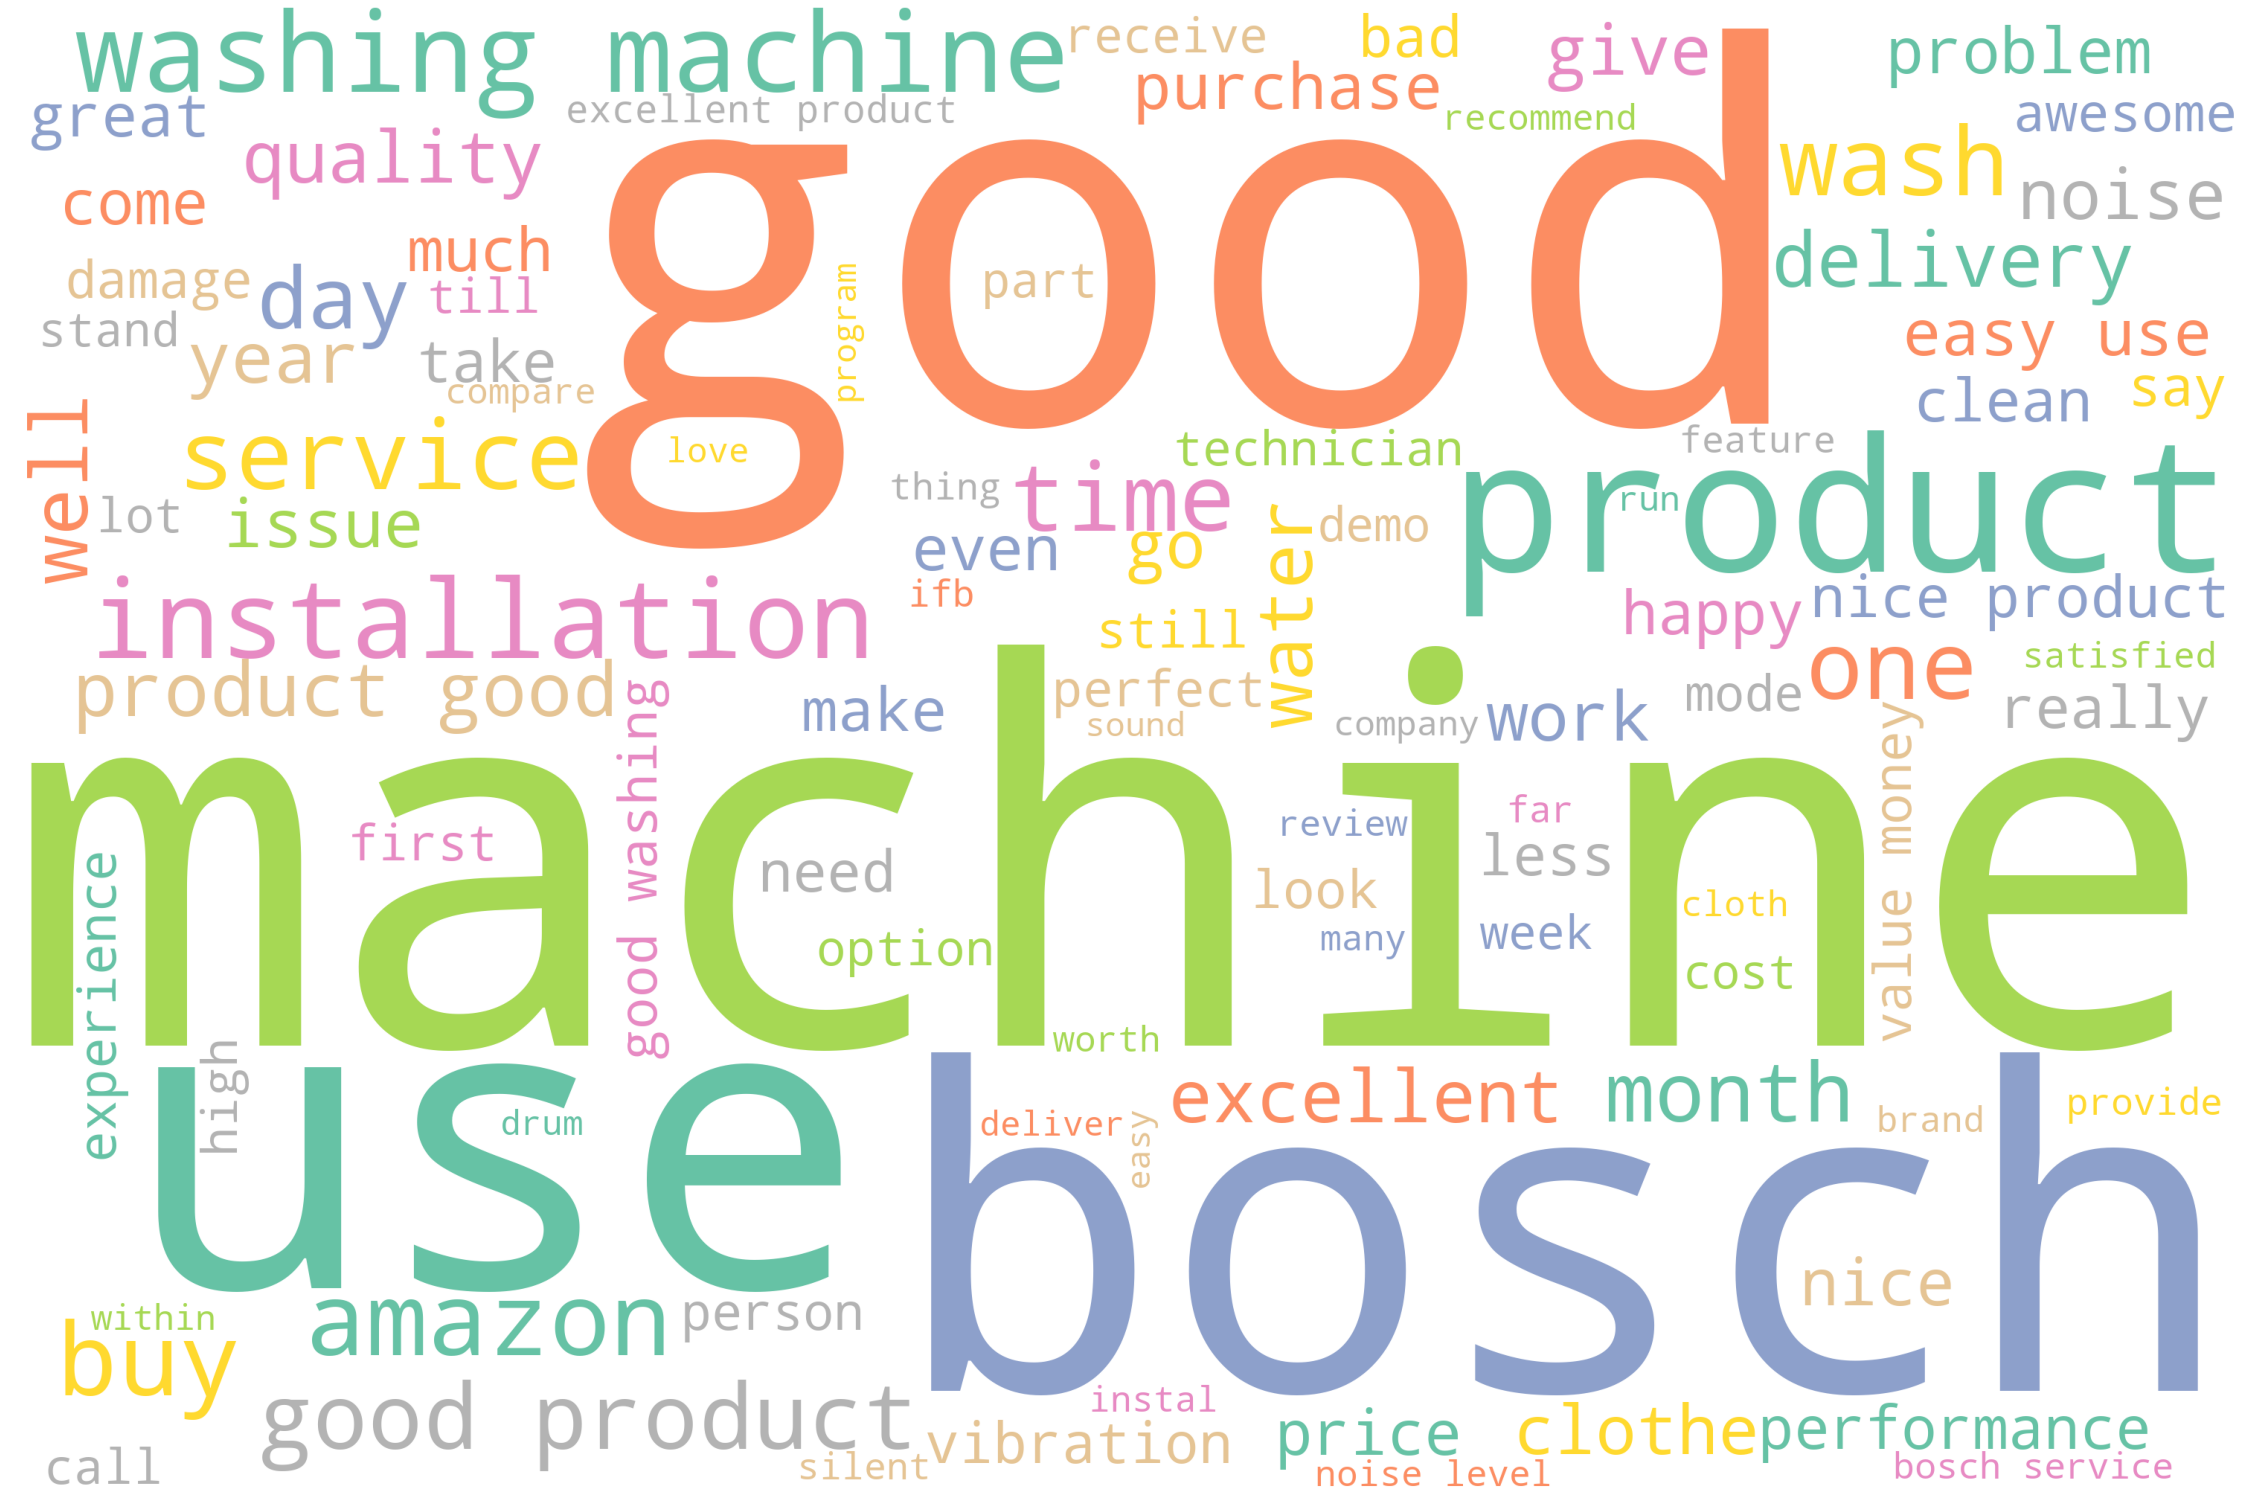

In [24]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [25]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [26]:
for token in doc_block[100:200]:
    print(token,token.pos_)

helpful ADJ
though PART
try VERB
sell NOUN
stand NOUN
machine NOUN
cover NOUN
etc X
etcnow X
machine NOUN
quite ADV
looker NUM
nice ADJ
design NOUN
brush PROPN
chrome PROPN
go VERB
stand VERB
keep VERB
level NOUN
surface NOUN
do AUX
not PART
need VERB
move VERB
around ADP
wash NOUN
expect VERB
major ADJ
pro ADJ
-PRON- X
set VERB
temperature NOUN
wash PROPN
mode NOUN
upto PROPN
90 NUM
degree NOUN
celsius PROPN
-PRON- PROPN
boon PROPN
wife PROPN
dust PROPN
allergy PROPN
-PRON- PUNCT
water NOUN
consumption NOUN
reduce NOUN
least ADJ
15 NUM
20 NUM
percent NOUN
very ADV
less ADJ
quantity NOUN
detergent NOUN
require VERB
less ADV
even ADV
half DET
prescribed ADJ
detergent NOUN
company NOUN
can VERB
take VERB
real ADJ
heavy ADJ
load NOUN
never ADV
possible ADJ
previous ADJ
top ADJ
load NOUN
1 NUM
very ADV
easy ADJ
operate NOUN
stop VERB
wash NOUN
cycle NOUN
put NOUN
thing NOUN
may VERB
forgotten VERB
faced ADJ
issue NOUN
whatsoever ADV
last ADJ
1 NUM
year NOUN
tap NOUN
filter NOUN
really ADV


In [27]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['installer', 'gasket', 'cost', 'tax', 'installation', 'consist', 'charge', 'part', 'can', 'remember', 'think', 'cover', 'cost', 'piece', 'technology', 'work', 'make', 'life', 'would', 'recommend', 'one', 'love', 'member', 'family', 'part', 'product', 'use', 'love', 'structure', 'color', 'design', 'product', 'month', '-PRON-', 'use', 'machine', 'seenuse', 'date', 'noise', 'vibration', 'use', 'stand', 'wash', 'quality', 'consumption', 'water', 'review', 'product', 'would', 'say', 'use', 'noise', 'purchase', 'bosch', 'installation', 'work', 'day', 'wait', 'installation', 'send', 'guy', 'installation', 'know', 'machine', 'come', 'choose', 'time', 'slot', 'pick', 'call', 'follow', 'hour', 'could', 'give', 'demo', 'let', 'installation', 'everytime', 'follow', 'tell', 'person', 'come', 'installation', 'hour', 'mention', 'body', 'turn', 'week', 'purchase', 'response', 'bother', 'decide', 'purchase', 'machine', 'rely', 'service', 'month', 'buy', 'happyi', 'move']


In [28]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,machine,507
1,product,498
2,use,244
3,washing,213
4,installation,180
5,service,155
6,buy,147
7,time,126
8,work,123
9,noise,123


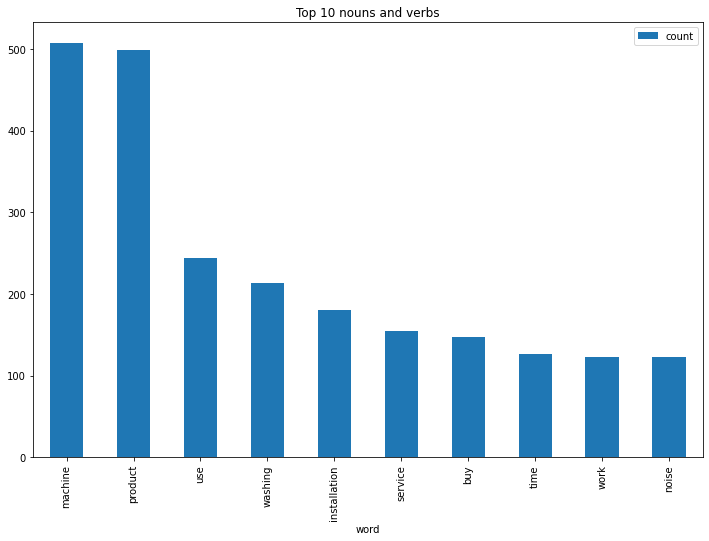

In [29]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [30]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I am totally disappointed with the product.There was no call from the bosch for installation & Demo and parts were broken while transit & bosch technician claim for replacement of parts but there was no call from bosch regarding replacement.',
 'Worst service ever I came across in the entire purchase history of Amazon.Bosch Hyd service center as well as technicians lie about dead lines multiple times.',
 "You wait for them wasting your time and the technicians don't pick up your phone for days.Product may be good but it's incomplete without service and support.",
 "That's why people prefer Samsung for everything for their swift and sophisticated service network.",
 'I am writing this review after nearly an year of use and I do have experience of using a Samsung FL which my parents have.',
 'After discount, I paid, 26,990 which I think was quite a bargain and also I got around 2.5k for my old machine.Delivery was as expected from Amazon, hassle free and on time.',
 'The installation h

In [31]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I am totally disappointed with the product.The...
1,Worst service ever I came across in the entire...
2,You wait for them wasting your time and the te...
3,That's why people prefer Samsung for everythin...
4,I am writing this review after nearly an year ...
...,...
1874,Exclusive service Good Good product It's silen...
1875,"Nice product I am not satisfied this item, thi..."
1876,Very good Good Nice product with no issue Rece...
1877,Very good Best performance Very Good Product V...


In [32]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Database/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [33]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [34]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [35]:
# manual testing
calculate_sentiment(text='good service')

3

In [36]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       -4
1       -6
2        4
3        4
4        0
        ..
1874    15
1875     5
1876    12
1877     9
1878    14
Name: sentiment_value, Length: 1879, dtype: int64

In [37]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       40
1       26
2       27
3       14
4       25
        ..
1874    19
1875    27
1876    26
1877    10
1878    13
Name: word_count, Length: 1879, dtype: int64

In [38]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
1,Worst service ever I came across in the entire...,-6,26
1671,Delivery was so bad product was totally damage...,-6,12
465,It appears the package was badly handled since...,-6,14
485,"Item got damaged in transit, had cracks and de...",-6,30
1522,Damaged received and no response from anyone (...,-6,26
...,...,...,...
1684,Good value for money Excellent Machine Moretha...,27,43
1789,Good product good One of the best Excellent ma...,28,24
1825,Excellent pricing Easy to use Good product Its...,31,56
1858,value for money Good Very good clothes damagin...,38,65


In [39]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1879.00000
mean        1.94678
std         3.86174
min        -6.00000
25%         0.00000
50%         1.00000
75%         3.00000
max        55.00000
Name: sentiment_value, dtype: float64

In [40]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,I am totally disappointed with the product.The...,-4,40
1,Worst service ever I came across in the entire...,-6,26
4,I am writing this review after nearly an year ...,0,25
6,The installation happened the next day.,0,6
9,I did not go for stand as I am keeping it on a...,0,23
...,...,...,...
1856,Go for it.,0,3
1864,Four stars to the product.,0,5
1865,Zero to amazon.,0,3
1870,If u r looking for a washing machine don't was...,-1,14


In [41]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,You wait for them wasting your time and the te...,4,27
3,That's why people prefer Samsung for everythin...,4,14
5,"After discount, I paid, 26,990 which I think w...",2,32
7,Person from Bosch was quite courteous and help...,4,8
8,"Though he did try to sell his own stand, machi...",3,25
...,...,...,...
1874,Exclusive service Good Good product It's silen...,15,19
1875,"Nice product I am not satisfied this item, thi...",5,27
1876,Very good Good Nice product with no issue Rece...,12,26
1877,Very good Best performance Very Good Product V...,9,10


In [42]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I am totally disappointed with the product.The...,-4,40,0
1,Worst service ever I came across in the entire...,-6,26,1
2,You wait for them wasting your time and the te...,4,27,2
3,That's why people prefer Samsung for everythin...,4,14,3
4,I am writing this review after nearly an year ...,0,25,4
...,...,...,...,...
1874,Exclusive service Good Good product It's silen...,15,19,1874
1875,"Nice product I am not satisfied this item, thi...",5,27,1875
1876,Very good Good Nice product with no issue Rece...,12,26,1876
1877,Very good Best performance Very Good Product V...,9,10,1877


C:\Users\Hitesh Koli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

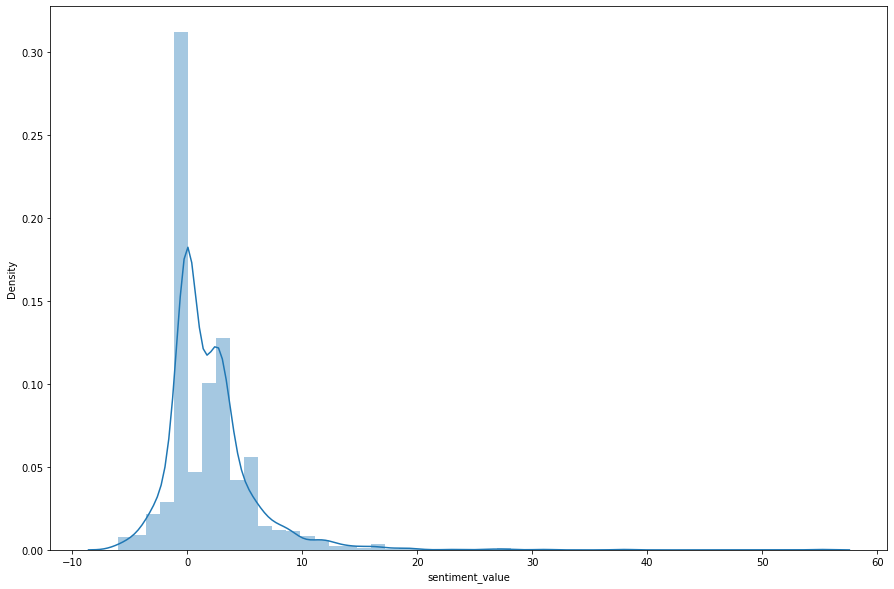

In [43]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

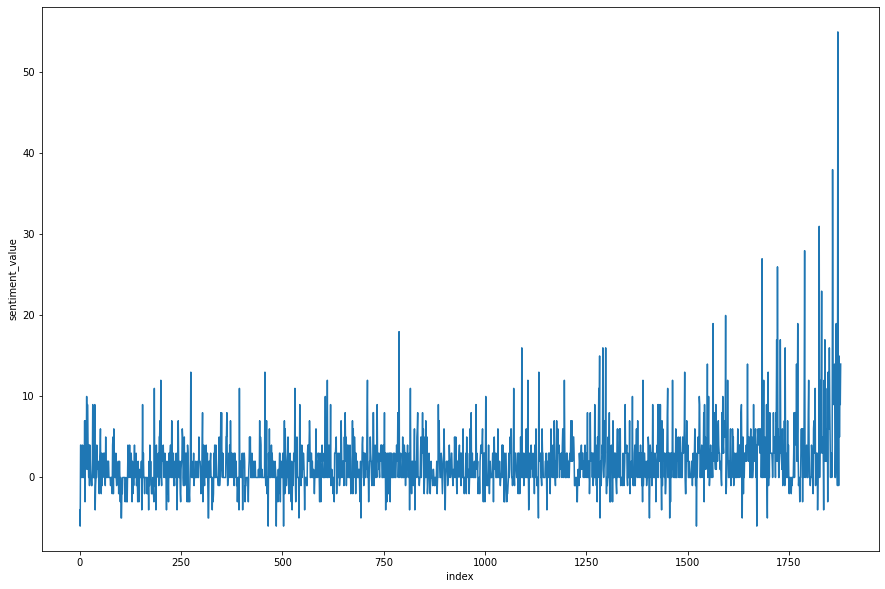

In [44]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)